In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("imputed_df.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   country                                       191 non-null    object 
 1   cooling_technologies_common                   145 non-null    object 
 2   total_data_centers                            191 non-null    int64  
 3   hyperscale_data_centers                       191 non-null    int64  
 4   colocation_data_centers                       191 non-null    int64  
 5   floor_space_sqft_total                        191 non-null    float64
 6   power_capacity_MW_total                       191 non-null    float64
 7   average_renewable_energy_usage_percent        191 non-null    float64
 8   internet_penetration_percent                  191 non-null    int64  
 9   growth_rate_of_data_centers_percent_per_year  191 non-null    flo

,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,internet_penetration_percent,growth_rate_of_data_centers_percent_per_year
count,191.000000,191.000000,191.000000,1.910000e+02,191.000000,191.000000,191.000000,191.000000
mean,60.685864,3.575916,30.445026,2.704513e+07,259.872251,43.417979,68.900524,476.946597
std,398.980748,23.347337,162.185098,2.607914e+08,1080.677132,32.169963,27.095845,620.871342
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.500000,0.000000,1.000000,8.000000e+03,1.000000,17.270000,46.000000,9.000000
50%,4.000000,0.000000,4.000000,3.250000e+04,15.000000,40.860000,80.000000,300.000000
75%,20.000000,0.000000,17.500000,3.000000e+05,147.500000,70.210000,90.500000,735.000000
max,5426.000000,300.000000,2000.000000,3.552000e+09,12000.000000,100.000000,100.000000,4900.000000


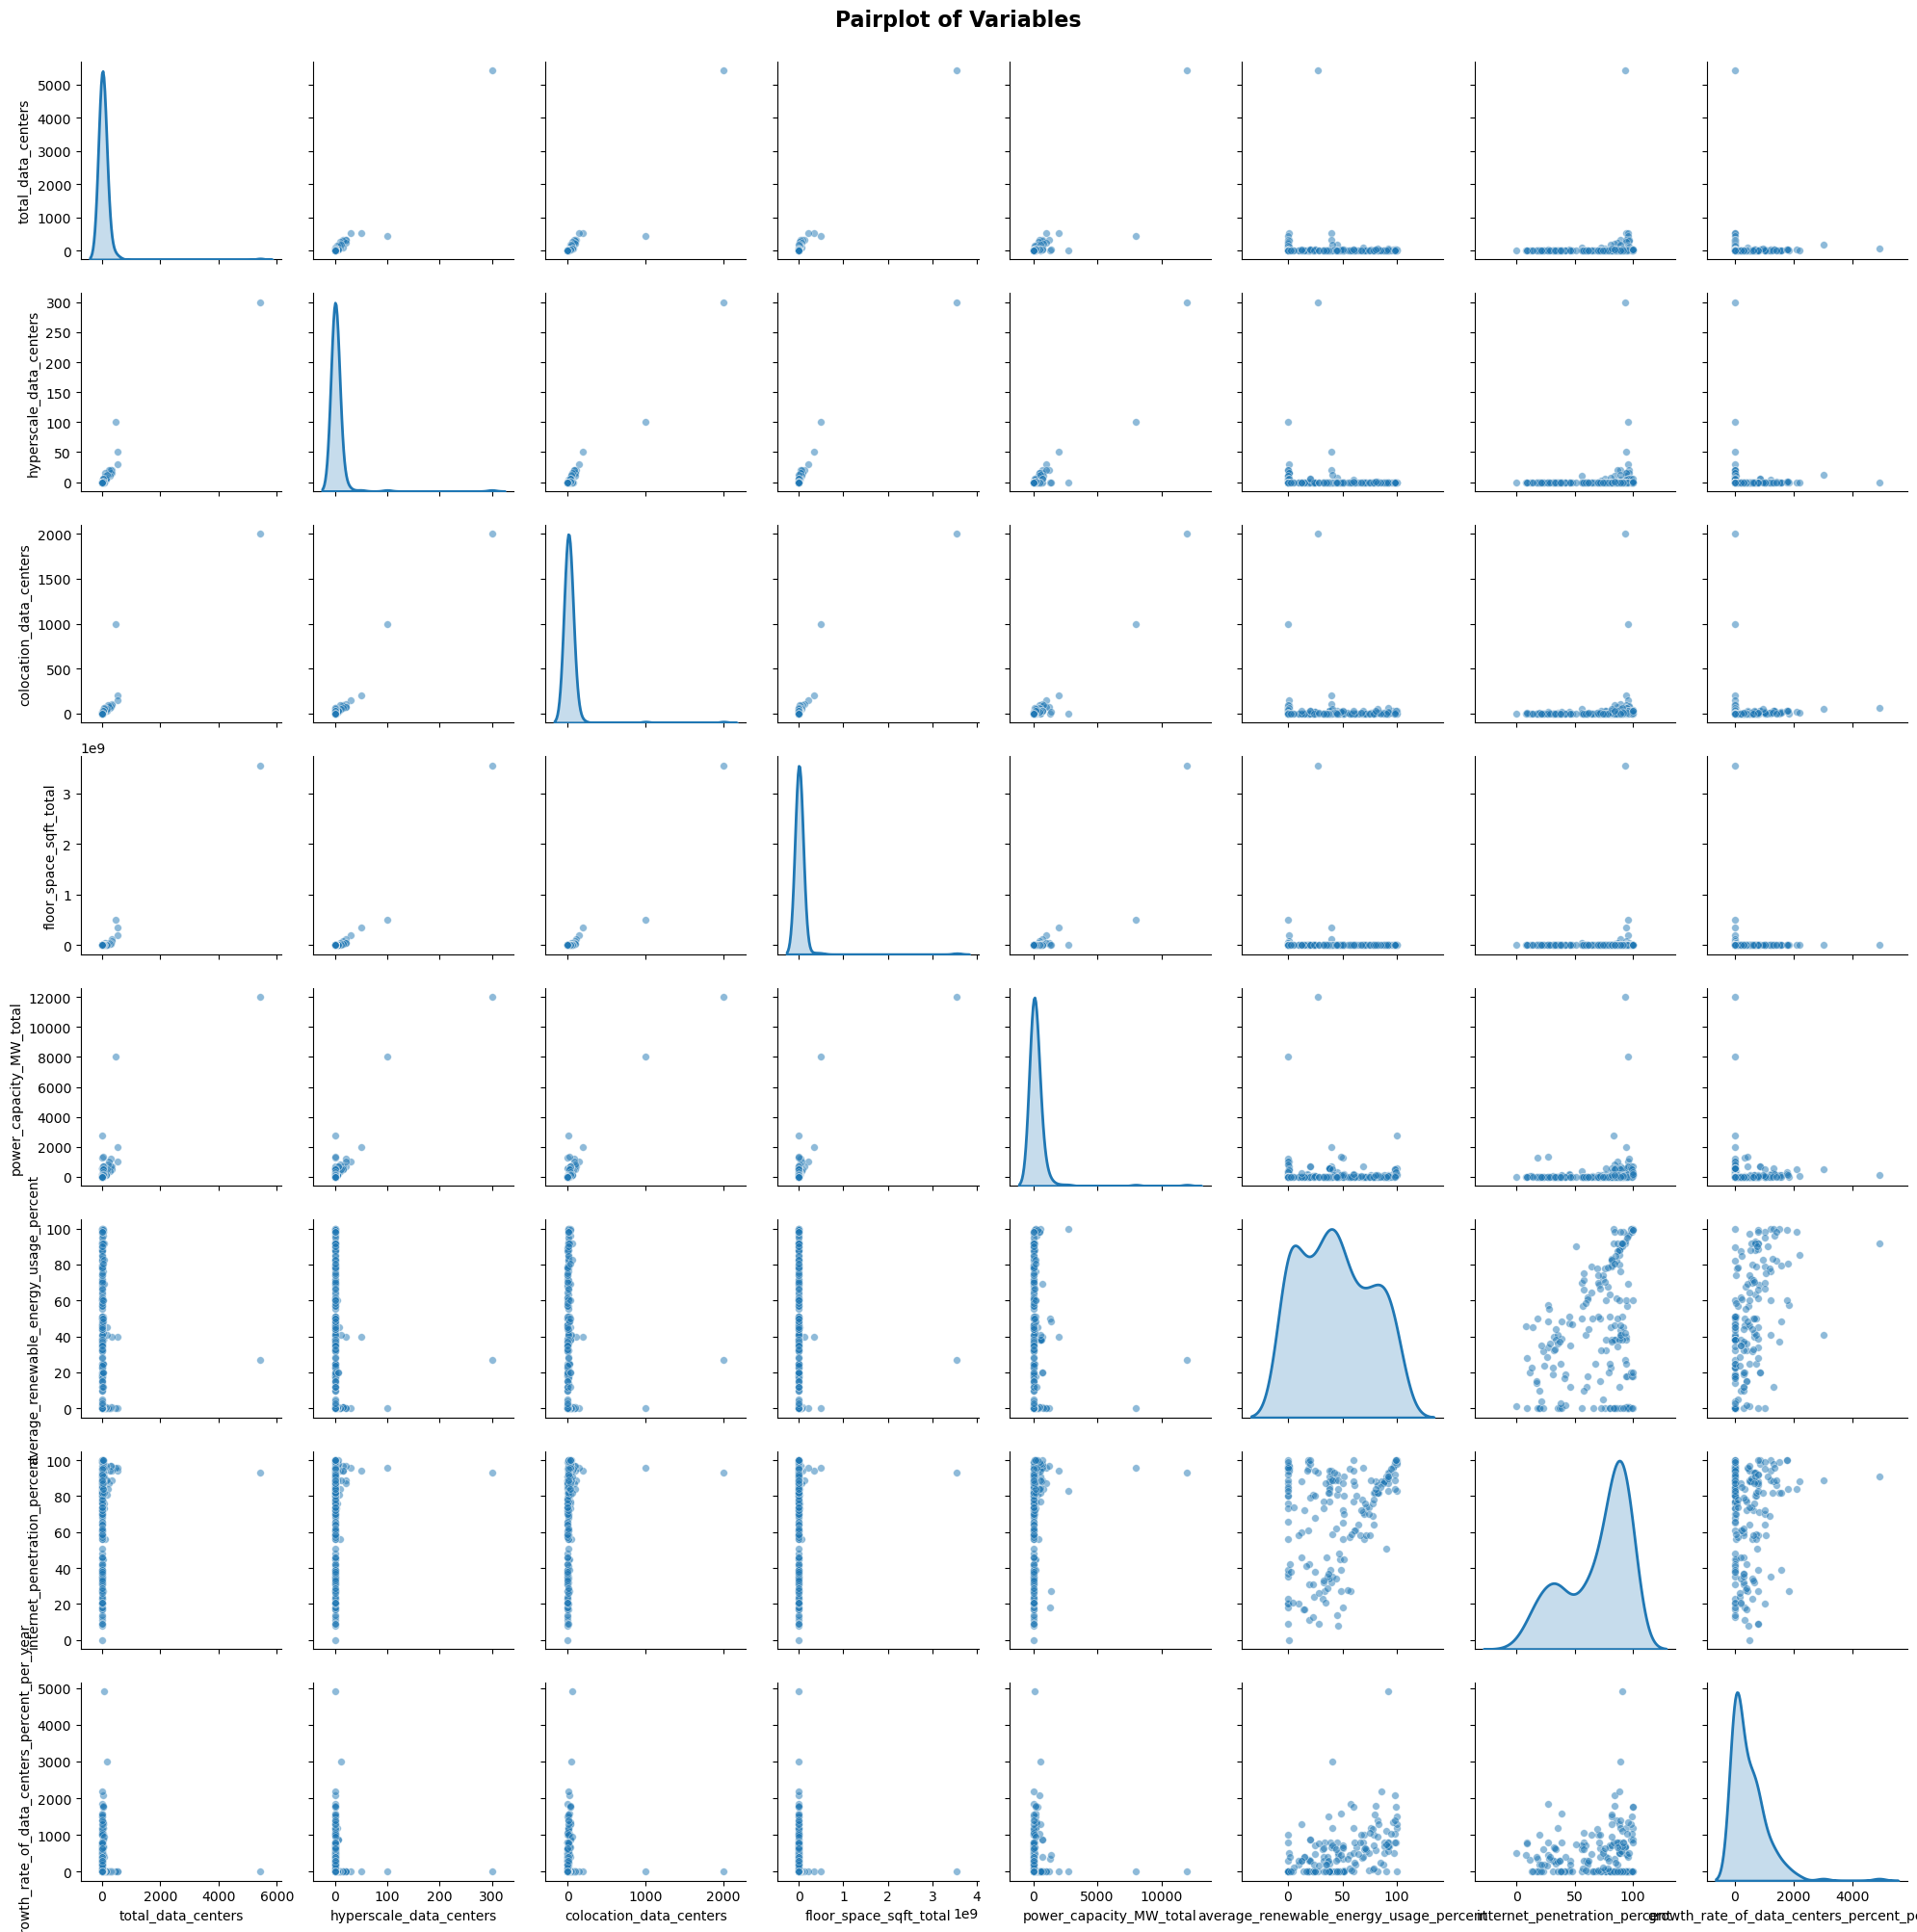

In [8]:
import seaborn as sns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]
sns.pairplot(df_numeric, diag_kind='kde', plot_kws={'alpha': 0.5, 's': 30}, diag_kws={'linewidth': 2})
plt.suptitle('Pairplot of Variables', y=1.001, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [9]:
print("------SKEWED VARIABLES IN DATASET------")
counter = 0
for col in df_numeric.columns:
    skewness = df_numeric[col].skew()
    if abs(skewness) > 1:
        counter = counter + 1
        print(f"{counter}.'{col}' skewness = {skewness:.2f}")

------SKEWED VARIABLES IN DATASET------
1.'total_data_centers' skewness = 12.96
2.'hyperscale_data_centers' skewness = 11.31
3.'colocation_data_centers' skewness = 10.67
4.'floor_space_sqft_total' skewness = 13.18
5.'power_capacity_MW_total' skewness = 8.87
6.'growth_rate_of_data_centers_percent_per_year' skewness = 2.78


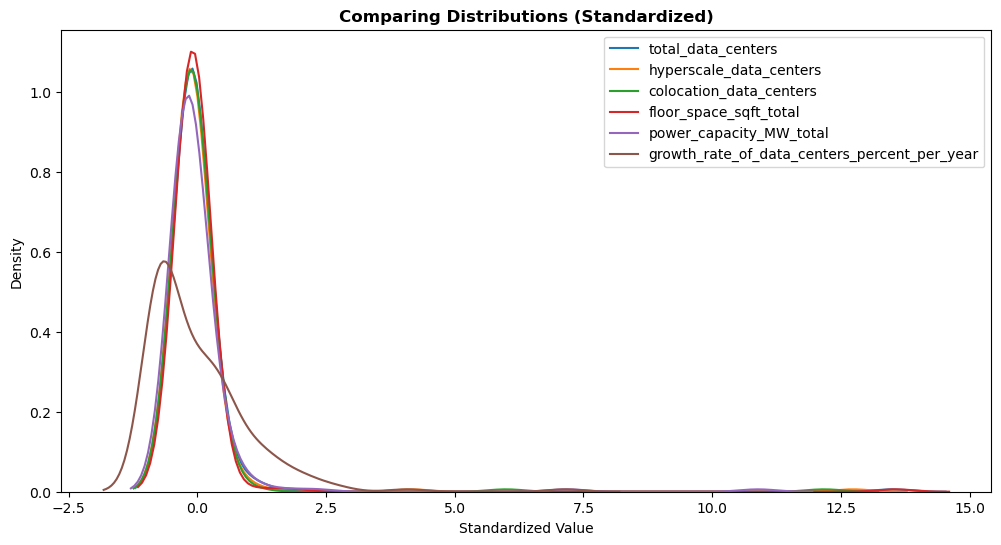

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standardized = pd.DataFrame(scaler.fit_transform(df_numeric),columns=df_numeric.columns,index=df_numeric.index)

fig, ax = plt.subplots(figsize=(12, 6))
for col in ['total_data_centers', 'hyperscale_data_centers','colocation_data_centers', 'floor_space_sqft_total','power_capacity_MW_total', 'growth_rate_of_data_centers_percent_per_year']:
    sns.kdeplot(df_standardized[col], ax=ax, label=col)
ax.set_xlabel('Standardized Value')
ax.set_title('Comparing Distributions (Standardized)', fontweight='bold')
ax.legend()
plt.show()

In [8]:
#Log Transformation
print('Skew Before for floor_space_sqft_total : ',df['floor_space_sqft_total'].skew())
df['log_floor_space_sqft_total'] = np.log1p(df['floor_space_sqft_total'])
print(f"Log-transformed skew: {df['log_floor_space_sqft_total'].skew():.3f}")

Skew Before for floor_space_sqft_total :  13.176753545081809
Log-transformed skew: -0.742


In [9]:
#Cube transformation
df['cbrt_floor_space_sqft_total'] = np.cbrt(df['floor_space_sqft_total'])
print(f"Exponential-transformed skew: {df['cbrt_floor_space_sqft_total'].skew():.3f}")

Exponential-transformed skew: 5.695


In [10]:
df['sqrt_floor_space_sqft_total'] = np.sqrt(df['floor_space_sqft_total'])
print(f"Square root-transformed skew: {df['sqrt_floor_space_sqft_total'].skew():.3f}")

Square root-transformed skew: 8.968


In [12]:
#from sklearn.preprocessing import PowerTransformer
#pt = PowerTransformer(method='yeo-johnson')
#df['yeojohnson_transform'] = pt.fit_transform(df[['floor_space_sqft_total']])
#print(f"Skewness after Yeo-Johnson Transformation: {df['yeojohnson_transform'].skew():.3f}")

Skewness after Yeo-Johnson Transformation: 0.042


In [61]:
df_numeric.head()

,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,internet_penetration_percent,growth_rate_of_data_centers_percent_per_year
0,5426,300,2000,3.552000e+09,12000.0,27.00,92.0,12.0
1,529,50,200,3.500000e+08,2000.0,40.00,92.0,8.0
2,523,30,150,2.000000e+08,1000.0,0.45,96.0,7.0
3,449,100,1000,5.000000e+08,8000.0,0.25,76.0,15.0
4,322,20,110,1.200000e+08,700.0,40.00,91.0,6.0


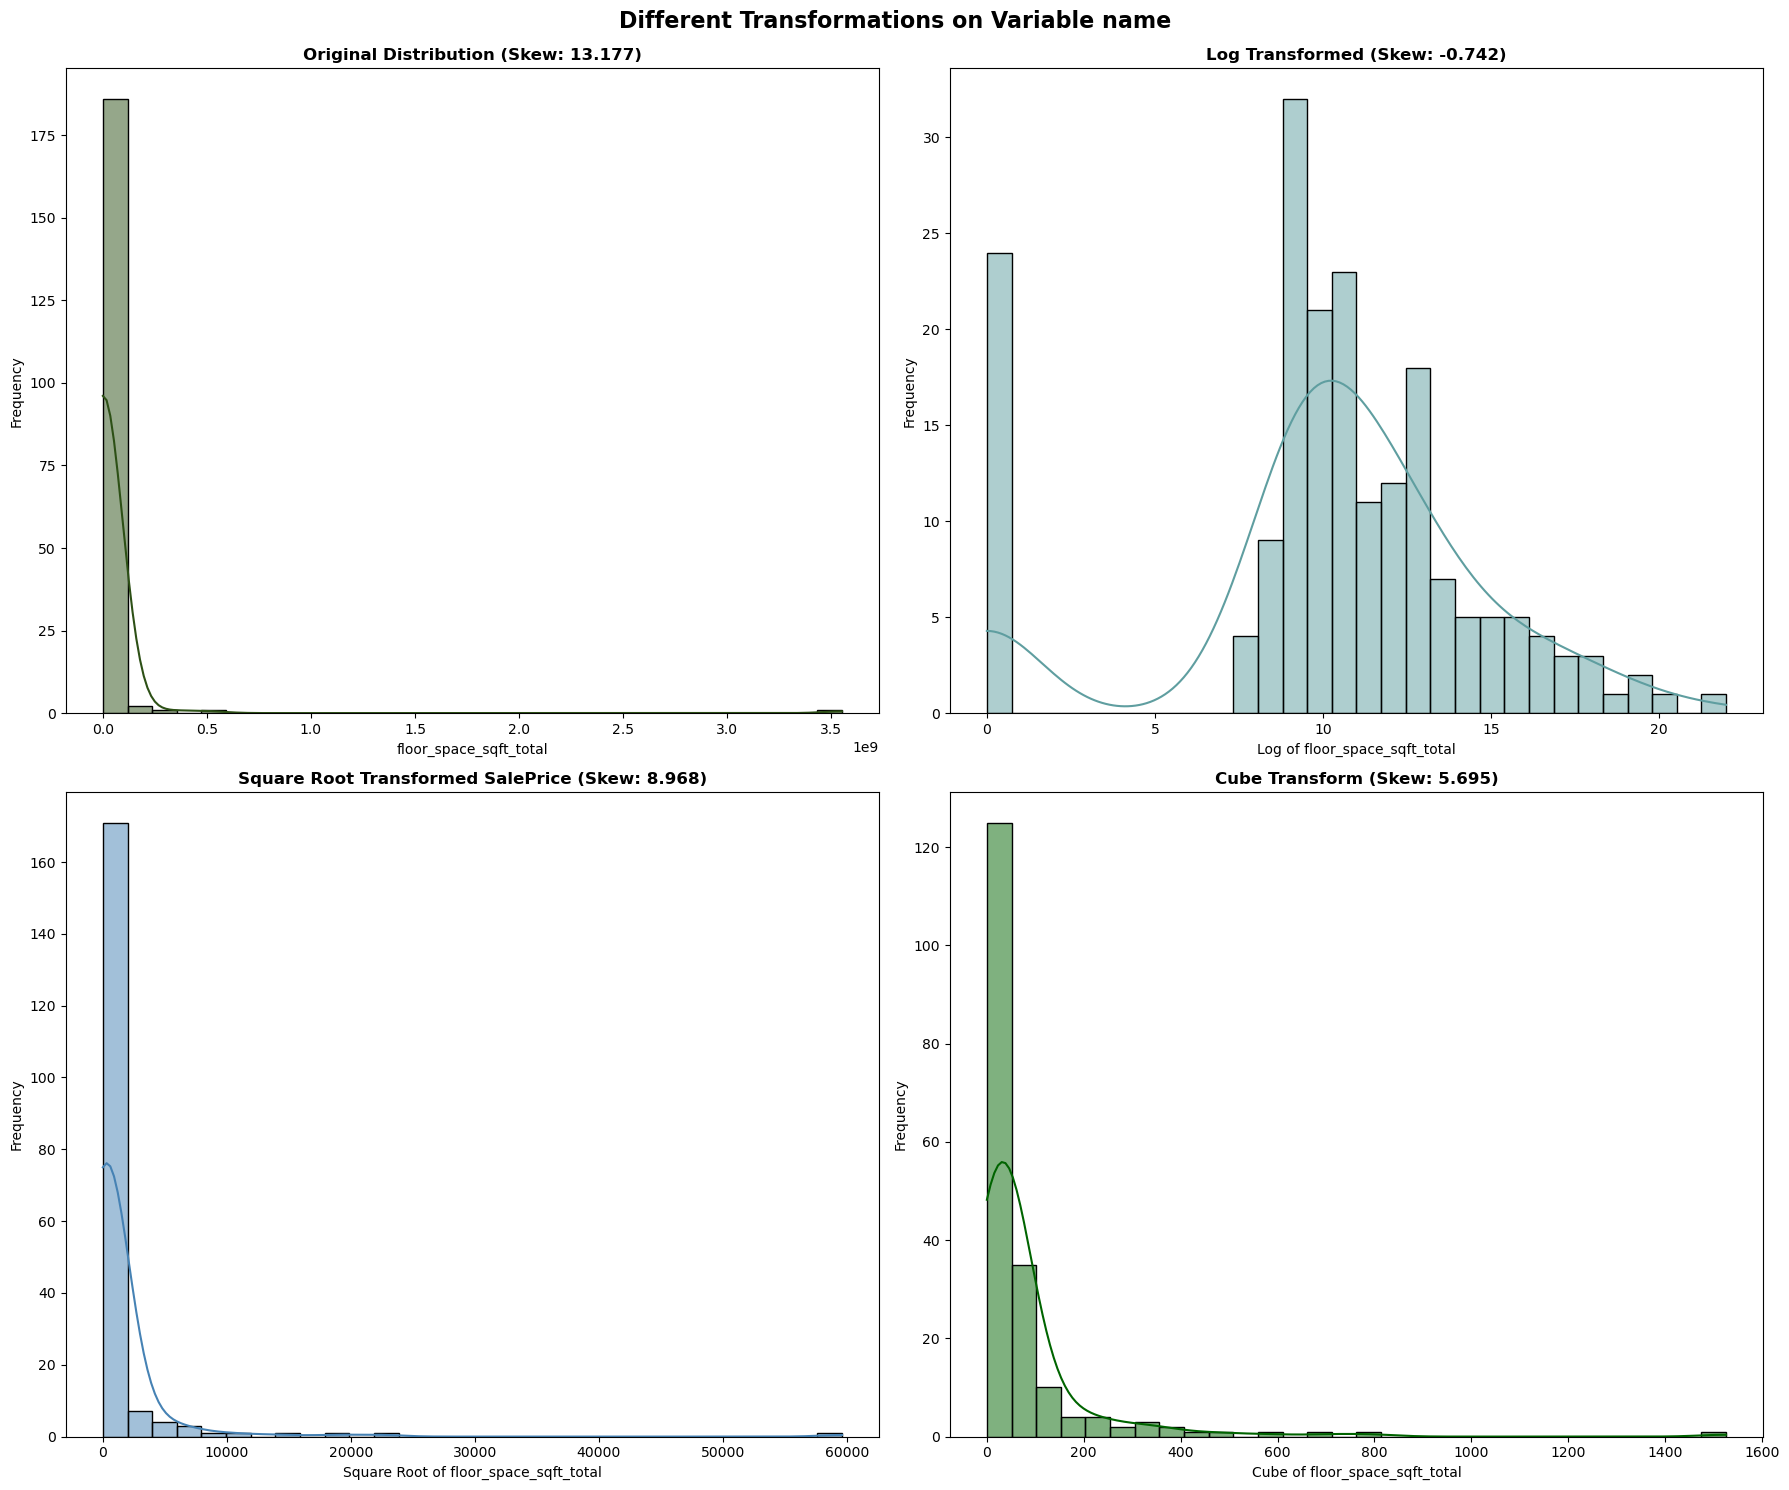

In [59]:
df_numeric_skewed = df[['total_data_centers', 'hyperscale_data_centers', 'colocation_data_centers', 'floor_space_sqft_total', 'power_capacity_MW_total', 'growth_rate_of_data_centers_percent_per_year']]
df_numeric['log_floor_space_sqft_total'] = np.log1p(df_numeric['floor_space_sqft_total'])
#print(f"Log-transformed skew: {df['log_floor_space_sqft_total'].skew():.3f}")
df_numeric['cbrt_floor_space_sqft_total'] = np.cbrt(df_numeric['floor_space_sqft_total'])
#print(f"Exponential-transformed skew: {df['cbrt_floor_space_sqft_total'].skew():.3f}")
df_numeric['sqrt_floor_space_sqft_total'] = np.sqrt(df_numeric['floor_space_sqft_total'])
#print(f"Square root-transformed skew: {df['sqrt_floor_space_sqft_total'].skew():.3f}")

fig, axes = plt.subplots(2, 2, figsize=(18, 15))
 
axes = axes.flatten()
 
# Original Distribution
sns.histplot(df_nnumeric['floor_space_sqft_total'], kde=True, bins=30, color='#2D5016', ax=axes[0])
axes[0].set_title(f'Original Distribution (Skew: {df_numeric['floor_space_sqft_total'].skew():.3f})', fontweight='bold')
axes[0].set_xlabel('floor_space_sqft_total')
axes[0].set_ylabel('Frequency')

#Log transformed
sns.histplot(df_numeric['log_floor_space_sqft_total'], kde=True, bins=30, color='#5F9EA0', ax=axes[1])
axes[1].set_title(f'Log Transformed (Skew: {df_numeric['log_floor_space_sqft_total'].skew():.3f})', fontweight='bold')
axes[1].set_xlabel('Log of floor_space_sqft_total')
axes[1].set_ylabel('Frequency')

# Square Root Transformed
sns.histplot(df_numeric['sqrt_floor_space_sqft_total'], kde=True, bins=30, color='#4682B4', ax=axes[2])
axes[2].set_title(f'Square Root Transformed SalePrice (Skew: {df['sqrt_floor_space_sqft_total'].skew():.3f})', fontweight='bold')
axes[2].set_xlabel('Square Root of floor_space_sqft_total')
axes[2].set_ylabel('Frequency')

#Cube root transformed
sns.histplot(df['cbrt_floor_space_sqft_total'], kde=True, bins=30, color='darkgreen', ax=axes[3])
axes[3].set_title(f'Cube Transform (Skew: {df['cbrt_floor_space_sqft_total'].skew():.3f})', fontweight='bold')
axes[3].set_xlabel('Cube of floor_space_sqft_total')
axes[3].set_ylabel('Frequency')

fig.suptitle(f'Different Transformations on Variable name', fontsize = 16, fontweight = 'bold', y = 0.99)
plt.tight_layout()
plt.show()

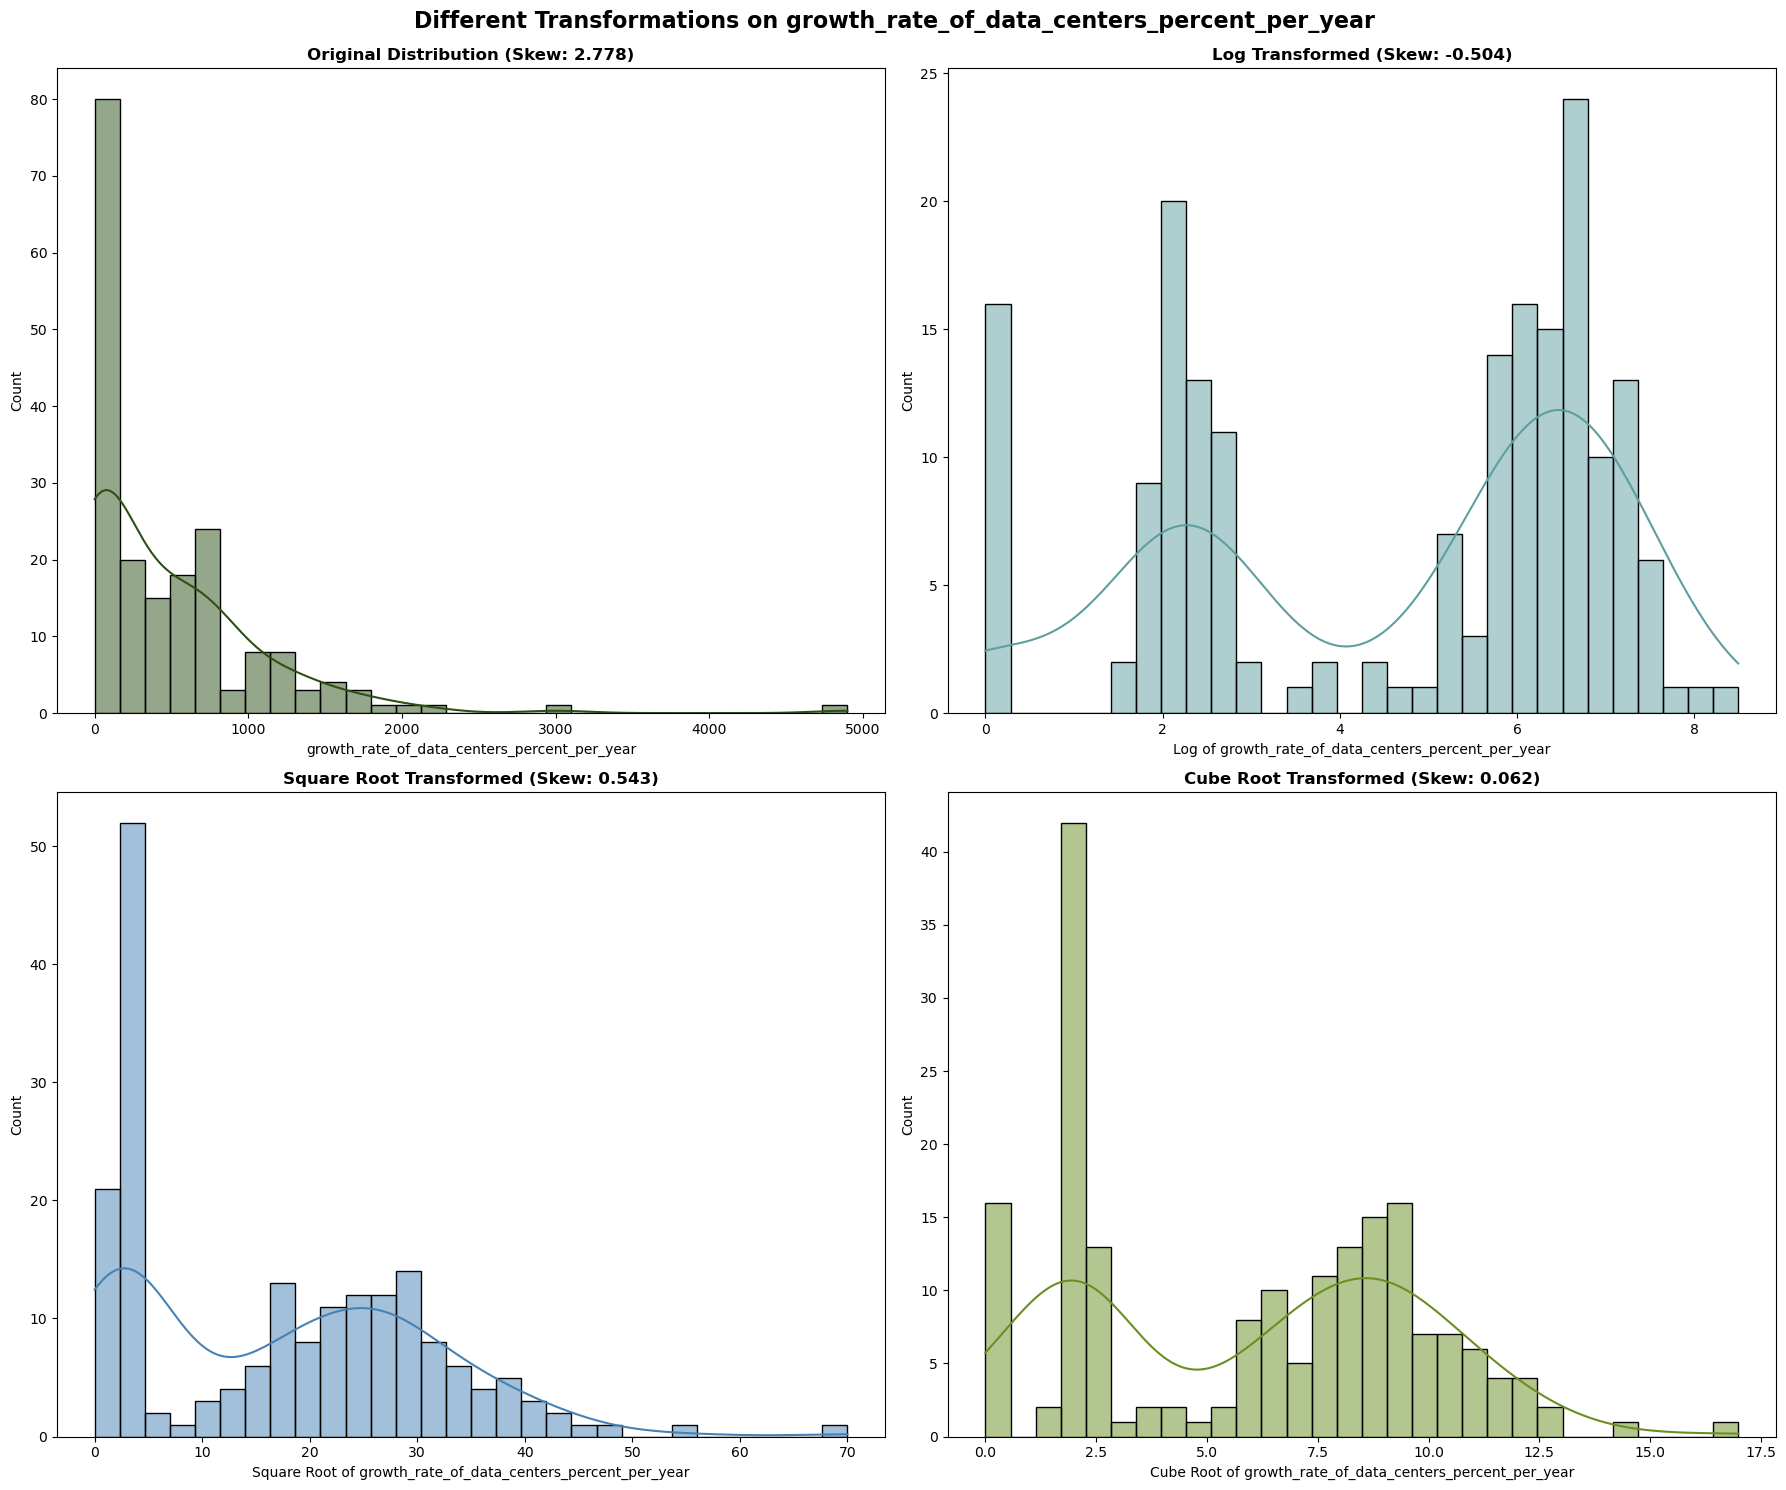

In [71]:
def plot_transformations(df, variable_name, figsize=(18, 15)):
    df_temp = df[[variable_name]].copy()
    
    df_temp['log_transform'] = np.log1p(df_temp[variable_name])
    df_temp['sqrt_transform'] = np.sqrt(df_temp[variable_name])
    df_temp['cbrt_transform'] = np.cbrt(df_temp[variable_name])
    
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.flatten()
    #Original
    sns.histplot(df_temp[variable_name], kde=True, bins=30, color='#2D5016', ax=axes[0])
    axes[0].set_title(f'Original Distribution (Skew: {df_temp[variable_name].skew():.3f})', fontweight='bold')
    axes[0].set_xlabel(variable_name)
    
    #Log Plot
    sns.histplot(df_temp['log_transform'], kde=True, bins=30, color='#5F9EA0', ax=axes[1])
    axes[1].set_title(f'Log Transformed (Skew: {df_temp["log_transform"].skew():.3f})', fontweight='bold')
    axes[1].set_xlabel(f'Log of {variable_name}')
    
    # Square Root plot
    sns.histplot(df_temp['sqrt_transform'], kde=True, bins=30, color='#4682B4', ax=axes[2])
    axes[2].set_title(f'Square Root Transformed (Skew: {df_temp["sqrt_transform"].skew():.3f})', fontweight='bold')
    axes[2].set_xlabel(f'Square Root of {variable_name}')
    
    # Cube Root Transformed
    sns.histplot(df_temp['cbrt_transform'], kde=True, bins=30, color='#6B8E23', ax=axes[3])
    axes[3].set_title(f'Cube Root Transformed (Skew: {df_temp["cbrt_transform"].skew():.3f})', 
                      fontweight='bold')
    axes[3].set_xlabel(f'Cube Root of {variable_name}')
    
    fig.suptitle(f'Different Transformations on {variable_name}', fontsize=16, fontweight='bold', y=0.99)
    
    plt.tight_layout()
    return fig

plot_transformations(df_numeric, 'growth_rate_of_data_centers_percent_per_year')
plt.show()
#df_numeric_skewed = df[['total_data_centers', 'hyperscale_data_centers', 'colocation_data_centers', 'floor_space_sqft_total', 'power_capacity_MW_total', 'growth_rate_of_data_centers_percent_per_year']]


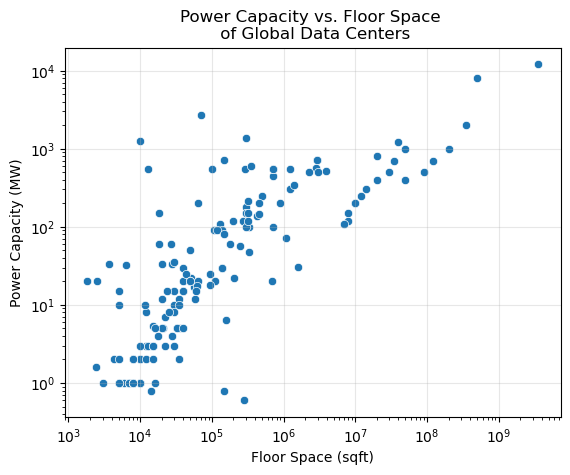

In [82]:
sns.scatterplot(data=df, x='floor_space_sqft_total', y='power_capacity_MW_total')
plt.title('Power Capacity vs. Floor Space \n of Global Data Centers')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Floor Space (sqft)")
plt.ylabel("Power Capacity (MW)")
plt.grid(alpha=0.3)
plt.show()

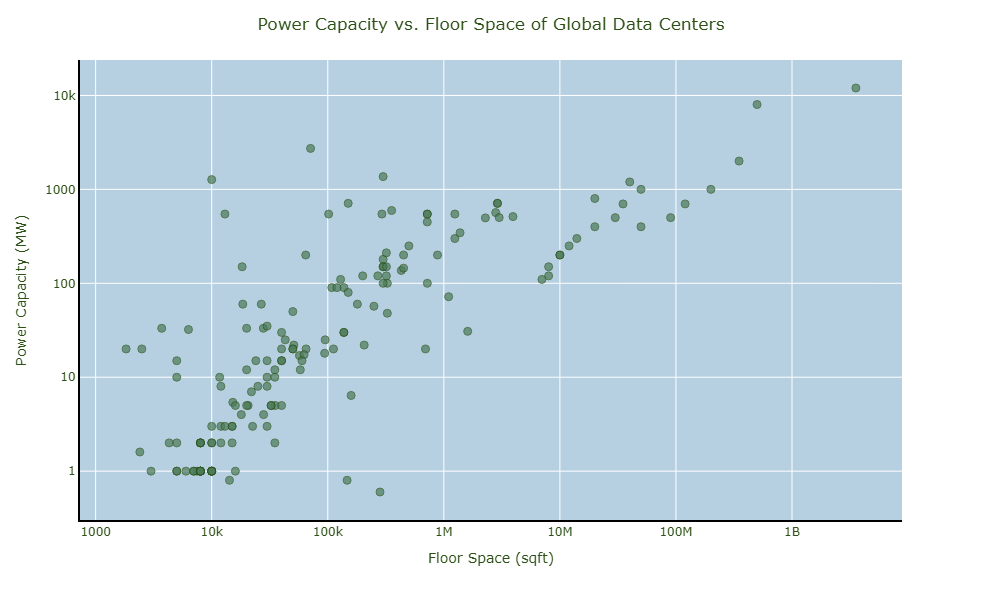

In [155]:
#interactive, simple, scatterplot
import plotly.express as px

fig = px.scatter(df, x='floor_space_sqft_total', y='power_capacity_MW_total', hover_name='country', log_x=True, log_y=True,color_discrete_sequence=['#2D5016'],hover_data=['total_data_centers'])

fig.update_layout(
    title = dict(
        text='Power Capacity vs. Floor Space of Global Data Centers',
        font =dict(color='#2D5016'),
        x=0.5
    ),
    xaxis_title_text="Floor Space (sqft)",
    yaxis_title_text="Power Capacity (MW)",
    height=600,
    width=900,
    yaxis=dict(
        type="log",
        dtick=1,
        color = '#2D5016',
        linewidth=2,
        linecolor='black'
    ),
    xaxis=dict(
        color='#2D5016',
        linewidth=2,
        linecolor='black'),
    plot_bgcolor='#B6D0E2'
)
fig.update_traces(
    marker=dict(
        size=8,
        color='#4A7C59',
        line=dict(width=1, color='#2D5016'),
        opacity=0.7
    )
)
fig.show()

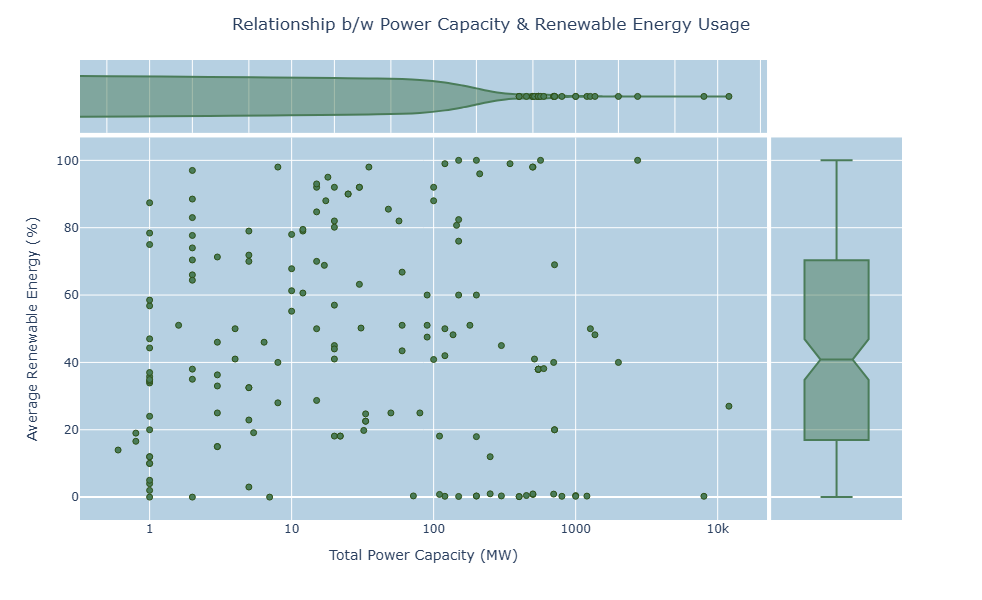

In [178]:
#scatterplot with marginals
import plotly.express as px

fig = px.scatter(df, 
                 x='power_capacity_MW_total', 
                 y='average_renewable_energy_usage_percent',
                 hover_name='country',
                 hover_data=['total_data_centers', 'floor_space_sqft_total'],
                 log_x=True,
                marginal_x="violin",
                marginal_y="box")

fig.update_layout(
    title_text='Relationship b/w Power Capacity & Renewable Energy Usage',
    title_x=0.5,
    xaxis_title_text="Total Power Capacity (MW)",
    yaxis_title_text="Average Renewable Energy (%)",
    xaxis=dict(
        dtick=1
    ),
    height=600,
    width=900,
    plot_bgcolor='#B6D0E2'
)

fig.update_traces(
    marker=dict(
        size=6,
        color='#4A7C59',
        line=dict(width=1, color='#2D5016')
    )
)

fig.show()

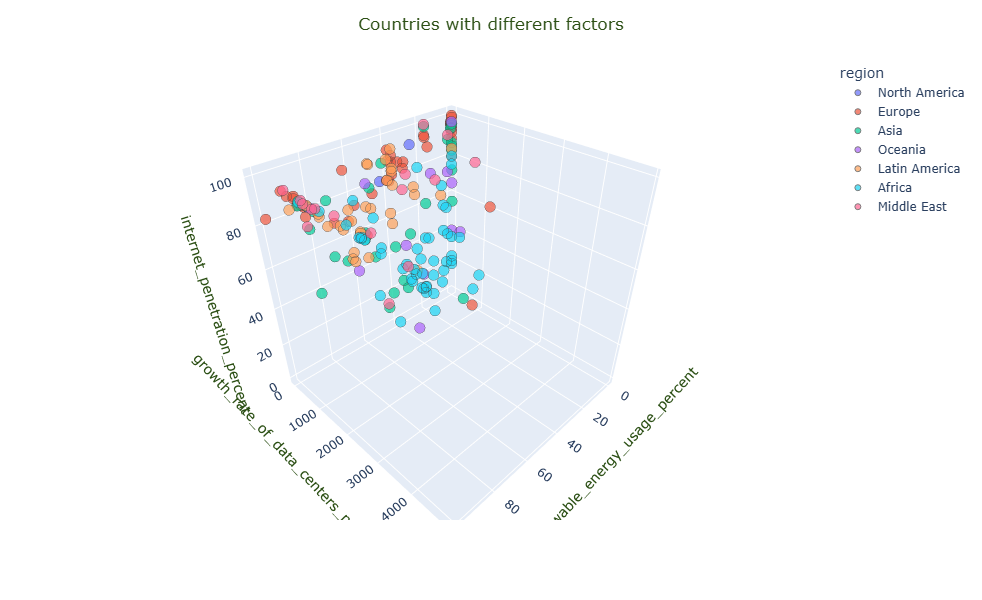

In [14]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("imputed_df.csv")
fig = px.scatter_3d(df, x = 'average_renewable_energy_usage_percent', 
                    y = 'growth_rate_of_data_centers_percent_per_year', 
                    z = 'internet_penetration_percent',
                    color = 'region',
                   opacity=0.7,
                   hover_name='country')
fig.update_layout(
    height=600, 
    width=700,
    title=dict(
        text='Countries with different factors',
        font=dict(color='#2D5016'),
        x=0.5
    ),
    scene=dict(
        xaxis=dict(title=dict(font=dict(color='#2D5016'))),  
        yaxis=dict(title=dict(font=dict(color='#2D5016'))),
        zaxis=dict(title=dict(font=dict(color='#2D5016')))
    )
)
fig.update_traces(
    marker=dict(
        size=6,
        line=dict(width=1)
    )
)
fig.show()